# 6.2 Correlations

Many Python packages, such as `numpy`, `scipy`, and `pandas` offer functionalities for correlation analysis. As we often work with data in the form of Pandas DataFrames, we will use the `pandas` package for now.

```{admonition} Pearson´s correlation
:class: note
Pearson’s correlation coefficient is calculated as the ratio of the covariance of two variables `X` and `Y` to the product of their standard deviations:

$$r = \frac{\text{Cov}(X, Y)}{s_X s_Y}$$
```

Let's start by creating a simple DataFrame containing an x and y variable:

In [1]:
import pandas as pd

data = {
    'X': range(10, 20),
    'Y': [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]
}

df = pd.DataFrame(data)
print(df)


    X   Y
0  10   2
1  11   1
2  12   4
3  13   5
4  14   8
5  15  12
6  16  18
7  17  25
8  18  96
9  19  48


We can then calculate the correlation between these two variables by using the `.corr()` method. By default, this method calculates Pearson’s correlation coefficient:

In [2]:
correlation_coef = df['X'].corr(df['Y'])
print("Pearson's correlation:", correlation_coef)

Pearson's correlation: 0.7586402890911867


The `.corr()` method also allows you to use rank correlations (Spearman, Kendall) thrugh the method parameter. For example, you can calculate Spearman’s rank correlation as follows:

In [3]:
print("Spearman correlation:",
      df['X'].corr(df['Y'],
      method='spearman'))

Spearman correlation: 0.9757575757575757


## Correlation Matrices

If we want to compute correlations for multiple variables, handling individual correlations will not be feasible. In such cases, we can calculate and use correlation matrices, which contain all pairwise correlations. Let’s start by creating a new DataFrame with four variables and then compute the correlation matrix, rounding the results to two decimal places:

In [4]:
# Define the data
data = {
    'A': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'B': [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
    'C': [9, 7, 8, 6, 5, 4, 3, 2, 1, 0],
    'D': [1, 3, 3, 5, 8, 3, 6, 12, 5, 34]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Compute the correlation matrix
corr_matrix = df.corr()

# Round the correlation matrix to 2 decimal places
corr_matrix_rounded = corr_matrix.round(2)
print(corr_matrix_rounded)

      A     B     C     D
A  1.00  0.76 -0.99  0.67
B  0.76  1.00 -0.75  0.35
C -0.99 -0.75  1.00 -0.67
D  0.67  0.35 -0.67  1.00


To make the results more visually appealing, we can plot the correlation matrix as a heatmap using the `seaborn` library:

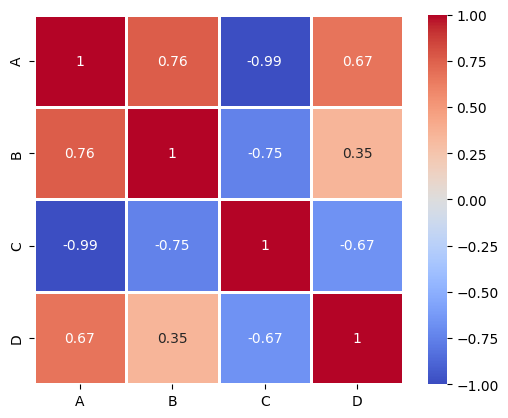

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix_rounded, 
            annot=True,      # Display correlation values inside the heatmap cells.
            vmin=-1, vmax=1, # Define the limits of the color scale
            square=True,     # Make sure cells stay square
            cmap="coolwarm", # Set the color map
            linewidths=1     # Lines between the cells
            )
plt.show()

```{admonition} Summary
:class: tip
- You can calculate correlations with various packages. In Pandas, you can use the `.corr()` method.
- A nice and intuitive way of visualizing multiple correlation values are correlation matrices (heatmaps).
```